# Zalando Image Dataset

## Setup

In [1]:
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-images-idx3-ubyte.gz -O ./data/t10k-images-idx3-ubyte.gz
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-labels-idx1-ubyte.gz -O ./data/t10k-labels-idx1-ubyte.gz
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz -O ./data/train-images-idx3-ubyte.gz
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz -O ./data/train-labels-idx1-ubyte.gz

--2022-02-11 07:59:03--  https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-images-idx3-ubyte.gz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz [following]
--2022-02-11 07:59:03--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4422102 (4.2M) [application/octet-stream]
Saving to: './data/t10k-images-idx3-ubyte.gz'

     0K .......... .......... .......... .......... ..

In [2]:
!wget https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/utils/mnist_reader.py -O mnist_reader.py

--2022-02-11 07:59:23--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/utils/mnist_reader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 756 [text/plain]
Saving to: 'mnist_reader.py'

     0K                                                       100% 37.2M=0s

2022-02-11 07:59:23 (37.2 MB/s) - 'mnist_reader.py' saved [756/756]



In [3]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data', kind='train')
X_test, y_test = mnist_reader.load_mnist('data', kind='t10k')

## Preprocessing

The data set contains 60.000 images.

In [10]:
X_train.shape

(60000, 784)

These are all 28 by 28 grayscale images.

In [8]:
28 * 28

784

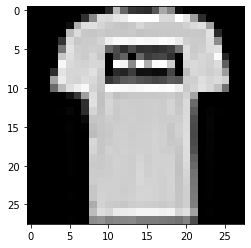

In [4]:
from matplotlib import pyplot as plt
from PIL import Image

example_image = Image.fromarray(X_train[1].reshape(28, 28), mode='P')
plt.imshow(example_image)

### Simple feature extraction

The simple features that will be extracted are the following:

* binned grayscale values (bin size 32)
* number of black pixels
* number of almost white pixels (any pixel higher or equal to 250)
* average grayscale value of 7x7 pixel regions (16 values in total)

In [6]:
from functools import reduce
from math import sqrt
import numpy as np
import pandas as pd

#stolen from TUWEL
flatten = lambda l: [item for sublist in l for item in sublist]

def make_bin(list, min, max, bin_range):
  arr = [0] * int((max - min) / bin_range)
  for i in list:
    bin = int(i / bin_range)
    arr[bin] = arr[bin] + 1
  return arr

def compute_region_brightness(image, region_width):
  avg_regions = []
  #normed_image = min_max_normed(image)
  im = Image.fromarray(image.reshape(28, 28), mode="P")
  for top in range(0, 28, region_width):
    for left in range(0, 28, region_width):
      cropped = im.crop((left, top, left + region_width, top + region_width))
      avg_regions.append(
          np.average(get_grayscale_pixels(cropped))
      )
  return avg_regions
  
def get_grayscale_pixels(image):
  pix = []
  width, height = image.size
  for i in range(0, width):
    for j in range(0, height):
      pix.append(image.getpixel((i,j)))
  return pix

def feature_extraction_zalando(image):
  black_indicator = lambda aggregator, x: aggregator+1 if x == 0 else aggregator+0
  almost_white_indicator = lambda aggregator, x: aggregator+1 if x >= 250 else aggregator+0
  n_black = reduce(black_indicator, image, 0)
  n_almost_white = reduce(almost_white_indicator, image, 0)
  
  bins = make_bin(X_train[1], 0, 256, 32)
  region_brightnesses = compute_region_brightness(X_train[1], 7)

  #sanity checks
  if sum(bins) != 28*28:
    print("WARNING! ERROR OCCURED WHEN CREATING HISTOGRAM BINS!")

  return flatten([[n_black], [n_almost_white], bins, region_brightnesses])

extracted_features = []
for (index, training_sample) in enumerate(X_train):
  extracted_features.append(feature_extraction_zalando(training_sample))
  if(index % 1000 == 0):
    print("Progress {}%".format(int((index * 100) / 60000)))
print("Completed 100%")

Progress 0%
Progress 1%
Progress 3%
Progress 5%
Progress 6%
Progress 8%
Progress 10%
Progress 11%
Progress 13%
Progress 15%
Progress 16%
Progress 18%
Progress 20%
Progress 21%
Progress 23%
Progress 25%
Progress 26%
Progress 28%
Progress 30%
Progress 31%
Progress 33%
Progress 35%
Progress 36%
Progress 38%
Progress 40%
Progress 41%
Progress 43%
Progress 45%
Progress 46%
Progress 48%
Progress 50%
Progress 51%
Progress 53%
Progress 55%
Progress 56%
Progress 58%
Progress 60%
Progress 61%
Progress 63%
Progress 65%
Progress 66%
Progress 68%
Progress 70%
Progress 71%
Progress 73%
Progress 75%
Progress 76%
Progress 78%
Progress 80%
Progress 81%
Progress 83%
Progress 85%
Progress 86%
Progress 88%
Progress 90%
Progress 91%
Progress 93%
Progress 95%
Progress 96%
Progress 98%
Completed 100%


In [15]:
df_zalando_simple = pd.DataFrame(data=extracted_features, columns=[
    "n_black", 
    "n_almost_white", 
    "<32", "<64", "<96", "<128", "<160", "<192", "<224", "<256",
    "avg_col_region_0_0", "avg_col_region_0_1", "avg_col_region_0_2", "avg_col_region_0_3",
    "avg_col_region_1_0", "avg_col_region_1_1", "avg_col_region_1_2", "avg_col_region_1_3",
    "avg_col_region_2_0", "avg_col_region_2_1", "avg_col_region_2_2", "avg_col_region_2_3",
    "avg_col_region_3_0", "avg_col_region_3_1", "avg_col_region_3_2", "avg_col_region_3_3"])

## Classification

Algorithms used:

* Logistic Regression
* MLP
* SVM
* LDA